# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


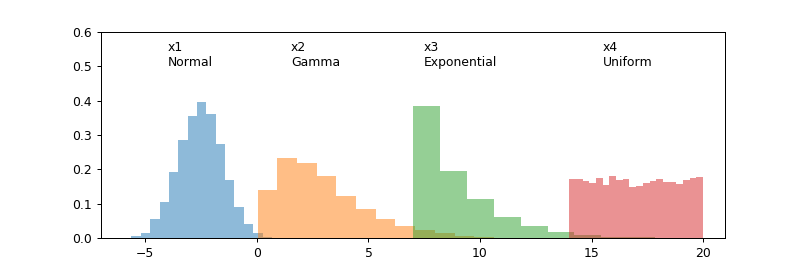

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


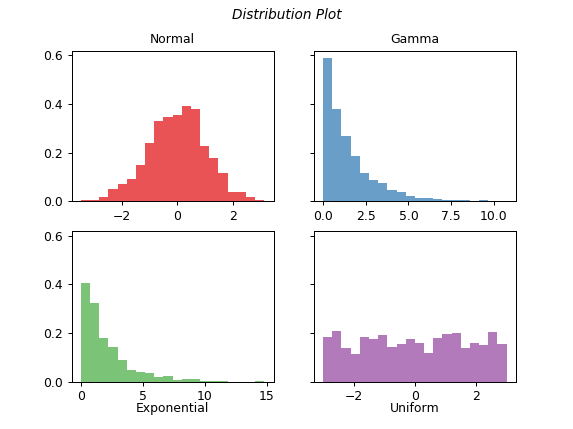

In [2]:
x1 = np.random.normal(0,1,1000)
x2 = np.random.gamma(1,1.5,1000)
x3 = np.random.exponential(2,1000)
x4 = np.random.uniform(-3,3,1000)
manyx = [x1,x2,x3,x4]
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharey= True)
axes = [ax1,ax2,ax3,ax4]
palette = plt.get_cmap('Set1')
for i in np.arange(4):
    axes[i].hist(manyx[i],normed = True,bins = 20, alpha = .75,color = palette(i))
axes[0].set_title('Normal',fontsize = 10,loc = 'center')
axes[1].set_title('Gamma',fontsize = 10,loc = 'center')
axes[2].set_title('Exponential',fontsize = 10,y = -.25)
axes[3].set_title('Uniform',fontsize = 10,y = -.25)
fig.suptitle('Distribution Plot',fontsize = 11,fontstyle = 'italic')

<IPython.core.display.Javascript object>


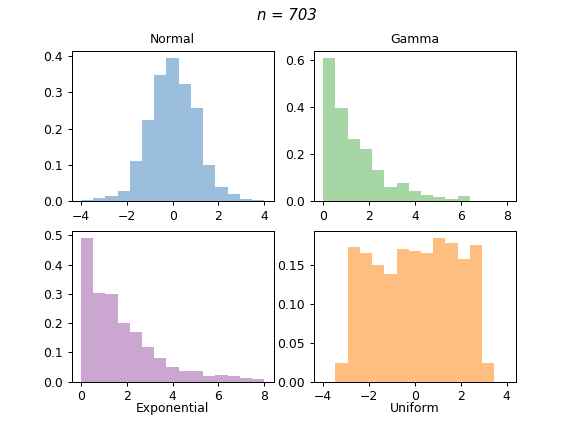

In [3]:
import matplotlib.animation as ani
n = 1000
x1 = np.random.normal(0,1,n)
x2 = np.random.gamma(1,1.5,n)
x3 = np.random.exponential(2,n)
x4 = np.random.uniform(-3,3,n)
manyx = [x1,x2,x3,x4]
fig2,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
axes = [ax1,ax2,ax3,ax4]

def update(curr):
    if curr == n:
        a.event_source.stop()
    for ax in axes:
        ax.clear()     
    ax1.hist(x1[:curr],normed= True,bins = np.linspace(-4,4,num = 16),alpha = .5,color = palette(1))
    ax2.hist(x2[:curr],normed = True,bins = np.linspace(0,8,num = 16),alpha = .5,color = palette(2))
    ax3.hist(x3[:curr],normed = True,bins = np.linspace(0,8,num =16),alpha = .5,color = palette(3))
    ax4.hist(x4[:curr],normed = True,bins = np.linspace(-4,4,num =16),alpha = .5, color = palette(4))
    ax1.set_title('Normal',fontsize = 10)
    ax2.set_title('Gamma', fontsize = 10)
    ax3.set_title('Exponential',fontsize = 10,y = -.25)
    ax4.set_title('Uniform',fontsize = 10,y = -.25)
    fig2.suptitle('n = {}'.format(curr),fontstyle = 'italic')

a = ani.FuncAnimation(fig2,update,interval = 10)

<IPython.core.display.Javascript object>


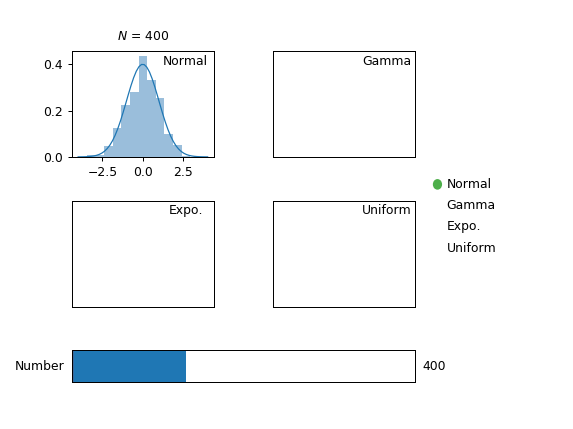

In [38]:
import matplotlib.widgets as widget
import matplotlib.gridspec as gridspec
fign = plt.figure()
gspec = gridspec.GridSpec(9,9)
# distribution plots
norm_plot = plt.subplot(gspec[0:3,0:3])
gamma_plot = plt.subplot(gspec[0:3,4:7])
expo_plot = plt.subplot(gspec[4:7,0:3])
unif_plot = plt.subplot(gspec[4:7,4:7])

all_plot = [norm_plot,gamma_plot,expo_plot,unif_plot]
dist = ['Normal','Gamma','Expo.','Uniform']

for plot in all_plot:
    plot.get_xaxis().set_visible(False)
    plot.get_yaxis().set_visible(False)

for i in np.arange(len(dist)):
    all_plot[i].set_title(dist[i],fontsize = 10,y = .8,x = .8)
    
    
# Widgets
Radios = plt.subplot(gspec[3:6,7:])
Slider = plt.subplot(gspec[8:,0:7])

# Add slider and RadioButton
Radios.axis('off')
sliderBins = widget.Slider(Slider,'Number',valmin = 100,valmax = 1000,valfmt = '%1.0f', closedmin = False,closedmax = False,valinit = 100)
radioButt = widget.RadioButtons(Radios,dist,activecolor=palette(2))

In [39]:
from scipy import stats

# def RadioButton
def hzfunc(label):
    plotdict = {'Normal':norm_plot,
                'Gamma':gamma_plot,
                'Expo.':expo_plot,
                'Uniform':unif_plot}  
    # plot selected subplot 
    ax = plotdict[label]
    global radioLabel
    radioLabel = radioButt.value_selected
    if label == 'Normal':
        norm_plot.cla()
        norm_plot.set_title('Normal',fontsize = 10,x = .8,y = .8)
        normdist = np.random.normal(0,1,int(sliderBins.val))
        normlin = np.linspace(-4,4)
        ax1 = ax.hist(normdist,normed = True,bins = np.linspace(-4,4,num = 16),alpha = .5,color = palette(1))
        # Fit a curveline
        m,s = stats.norm.fit(normdist)
        normpdf = stats.norm.pdf(normlin,m,s)
        norm_plot.plot(normlin,normpdf,lw = 1)
        
        # Text number of bins. Note: italicized with r"$\mathit{}$"
        norm_plot.text(.5,1.1,r"$\mathit{N}$"+' = {}'.format(int(sliderBins.val)),transform = norm_plot.transAxes,horizontalalignment = 'center')
        
        # Get axes
        norm_plot.get_xaxis().set_visible(True)
        norm_plot.get_yaxis().set_visible(True)
        
    elif label == 'Gamma':
        gamma_plot.cla()
        gamma_plot.set_title('Gamma',fontsize = 10, x = .8,y = .8)
        gammadist = np.random.gamma(1,1.5,int(sliderBins.val))
        gammalin = np.linspace(0,8)
        ax2 = ax.hist(np.random.gamma(1,1.5,int(sliderBins.val)),normed = True, bins = np.linspace(0,8,num = 16),alpha = .5,color = palette(2))
        a,b,c = stats.gamma.fit(gammadist)
        gammapdf = stats.gamma.pdf(gammalin,a,b,c)
        gamma_plot.plot(gammalin,gammapdf,lw = 1,color = palette(2))
        
        gamma_plot.text(.5,1.1,r"$\mathit{N}$"+' = {}'.format(int(sliderBins.val)),transform = gamma_plot.transAxes,horizontalalignment = 'center')

        gamma_plot.get_xaxis().set_visible(True)
        gamma_plot.get_yaxis().set_visible(True)
        
        
    elif label == 'Expo.':
        expo_plot.cla()
        expo_plot.set_title('Expo.',fontsize = 10, x = .8, y = .8)
        expodist = np.random.exponential(2,int(sliderBins.val))
        expolin = np.linspace(0,8)
        ax3 = ax.hist(np.random.exponential(2,int(sliderBins.val)),normed = True, bins = np.linspace(0,8,num = 16),alpha = .5,color = palette(3))
        a,b = stats.expon.fit(expodist)
        expopdf = stats.expon.pdf(expolin,a,b)
        expo_plot.plot(expolin,expopdf,lw =1,color = palette(3))
        
        expo_plot.text(.5,-.3,r"$\mathit{N}$"+' = {}'.format(int(sliderBins.val)),transform = expo_plot.transAxes,horizontalalignment = 'center')

        expo_plot.get_xaxis().set_visible(True)
        expo_plot.get_yaxis().set_visible(True)
        
    elif label == 'Uniform':
        unif_plot.cla()
        unif_plot.set_title('Uniform',fontsize = 10, x = .8, y = .8)
        unifdist = np.random.uniform(-3,3,int(sliderBins.val))
        uniflin = np.linspace(-3,3)
        ax4 = ax.hist(np.random.uniform(-3,3,int(sliderBins.val)),normed = True, bins = np.linspace(-3,3,num = 16),alpha = .5,color = palette(4))    
        a,b = stats.uniform.fit(unifdist)
        unifpdf = stats.uniform.pdf(uniflin,a,b)
        unif_plot.plot(np.linspace(-3,3),unifpdf,lw = 1,color = palette(4))
        
        unif_plot.text(.5,-.3,r"$\mathit{N}$"+' = {}'.format(int(sliderBins.val)),transform = unif_plot.transAxes,horizontalalignment = 'center')

        unif_plot.get_xaxis().set_visible(True)
        unif_plot.get_yaxis().set_visible(True)
radioButt.on_clicked(hzfunc)



# def slider

def update(val):
    val = int(sliderBins.val)
    if radioLabel == 'Normal':
        norm_plot.cla()
        norm_plot.set_title('Normal',fontsize = 10,x = .8,y = .8)
        normdist = np.random.normal(0,1,int(sliderBins.val))
        normlin = np.linspace(-4,4)
        ax1 = ax.hist(normdist,normed = True,bins = np.linspace(-4,4,num = 16),alpha = .5,color = palette(1))
        # Fit a curveline
        m,s = stats.norm.fit(normdist)
        normpdf = stats.norm.pdf(normlin,m,s)
        norm_plot.plot(normlin,normpdf,lw = 1)
        
        # Text number of bins. Note: italicized with r"$\mathit{}$"
        norm_plot.text(.5,1.1,r"$\mathit{N}$"+' = {}'.format(int(sliderBins.val)),transform = norm_plot.transAxes,horizontalalignment = 'center')
        
        # Get axes
        norm_plot.get_xaxis().set_visible(True)
        norm_plot.get_yaxis().set_visible(True)
        
    elif radioLabel == 'Gamma':
        gamma_plot.cla()
        gamma_plot.set_title('Gamma',fontsize = 10, x = .8,y = .8)
        gammadist = np.random.gamma(1,1.5,int(sliderBins.val))
        gammalin = np.linspace(0,8)
        ax2 = ax.hist(np.random.gamma(1,1.5,int(sliderBins.val)),normed = True, bins = np.linspace(0,8,num = 16),alpha = .5,color = palette(2))
        a,b,c = stats.gamma.fit(gammadist)
        gammapdf = stats.gamma.pdf(gammalin,a,b,c)
        gamma_plot.plot(gammalin,gammapdf,lw = 1,color = palette(2))
        
        gamma_plot.text(.5,1.1,r"$\mathit{N}$"+' = {}'.format(int(sliderBins.val)),transform = gamma_plot.transAxes,horizontalalignment = 'center')

        gamma_plot.get_xaxis().set_visible(True)
        gamma_plot.get_yaxis().set_visible(True)
        
        
    elif radioLabel == 'Expo.':
        expo_plot.cla()
        expo_plot.set_title('Expo.',fontsize = 10, x = .8, y = .8)
        expodist = np.random.exponential(2,int(sliderBins.val))
        expolin = np.linspace(0,8)
        ax3 = ax.hist(np.random.exponential(2,int(sliderBins.val)),normed = True, bins = np.linspace(0,8,num = 16),alpha = .5,color = palette(3))
        a,b = stats.expon.fit(expodist)
        expopdf = stats.expon.pdf(expolin,a,b)
        expo_plot.plot(expolin,expopdf,lw =1,color = palette(3))
        
        expo_plot.text(.5,-.3,r"$\mathit{N}$"+' = {}'.format(int(sliderBins.val)),transform = expo_plot.transAxes,horizontalalignment = 'center')

        expo_plot.get_xaxis().set_visible(True)
        expo_plot.get_yaxis().set_visible(True)
        
    elif radioLabel == 'Uniform':
        unif_plot.cla()
        unif_plot.set_title('Uniform',fontsize = 10, x = .8, y = .8)
        unifdist = np.random.uniform(-3,3,int(sliderBins.val))
        uniflin = np.linspace(-3,3)
        ax4 = ax.hist(np.random.uniform(-3,3,int(sliderBins.val)),normed = True, bins = np.linspace(-3,3,num = 16),alpha = .5,color = palette(4))    
        a,b = stats.uniform.fit(unifdist)
        unifpdf = stats.uniform.pdf(uniflin,a,b)
        unif_plot.plot(np.linspace(-3,3),unifpdf,lw = 1,color = palette(4))
        
        unif_plot.text(.5,-.3,r"$\mathit{N}$"+' = {}'.format(int(sliderBins.val)),transform = unif_plot.transAxes,horizontalalignment = 'center')

        unif_plot.get_xaxis().set_visible(True)
        unif_plot.get_yaxis().set_visible(True)
